In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [2]:
train = pd.read_csv('./train-data.csv')
train
#note that Price column has a unit of INR Lakhs

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
train = train.drop(['Unnamed: 0','Name','New_Price'],axis=1)
train.isnull().sum() / len(train)

Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
Price                0.000000
dtype: float64

In [4]:
train = train.dropna()
train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [5]:
train.info()
#Mileage, Engine, and Power should all be numerical data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   object 
 7   Engine             5975 non-null   object 
 8   Power              5975 non-null   object 
 9   Seats              5975 non-null   float64
 10  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 560.2+ KB


In [6]:
#Mileage in same unit, removing units
train['Mileage'] = train['Mileage'].map(lambda x: float(x[:-5])) 
train.Mileage

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 5975, dtype: float64

In [7]:
#same for engine
train['Engine'] = train['Engine'].map(lambda x: float(x[:-2])) 
train.Engine

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 5975, dtype: float64

In [8]:
#There is 'null bhp' value in power so removing those and do the same
train = train[train['Power'] != 'null bhp'].reset_index(drop=True)
train['Power'] = train['Power'].map(lambda x: float(x[:-3])) 
train.Power

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
5867     74.00
5868     71.00
5869    112.00
5870     67.10
5871     57.60
Name: Power, Length: 5872, dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 504.8+ KB


In [10]:
#deal with object columns
print(train.Location.value_counts())
print(train.Fuel_Type.value_counts())
print(train.Transmission.value_counts())
print(train.Owner_Type.value_counts())

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64


In [11]:
#Change Owner_Type into int numbers
train.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train['Owner_Type'].value_counts()

1    4839
2     925
3     101
4       7
Name: Owner_Type, dtype: int64

In [12]:
#get dummies the rests
train1 = pd.concat([train.drop(['Location','Fuel_Type','Transmission'],axis=1), 
                pd.get_dummies(train.Location),
                pd.get_dummies(train.Transmission),
                pd.get_dummies(train['Fuel_Type'])], axis = 1)
train1

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,...,Kochi,Kolkata,Mumbai,Pune,Automatic,Manual,CNG,Diesel,LPG,Petrol
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,1,0,0,1,1,0,0,0
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,0,0,1,0,1,0,1,0,0
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,1,28.40,1248.0,74.00,5.0,4.75,0,0,...,0,0,0,0,0,1,0,1,0,0
5868,2015,100000,1,24.40,1120.0,71.00,5.0,4.00,0,0,...,0,0,0,0,0,1,0,1,0,0
5869,2012,55000,2,14.00,2498.0,112.00,8.0,2.90,0,0,...,0,0,0,0,0,1,0,1,0,0
5870,2013,46000,1,18.90,998.0,67.10,5.0,2.65,0,0,...,0,1,0,0,0,1,0,0,0,1


In [13]:
X = train1.drop('Price', axis=1)
y = train1.Price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

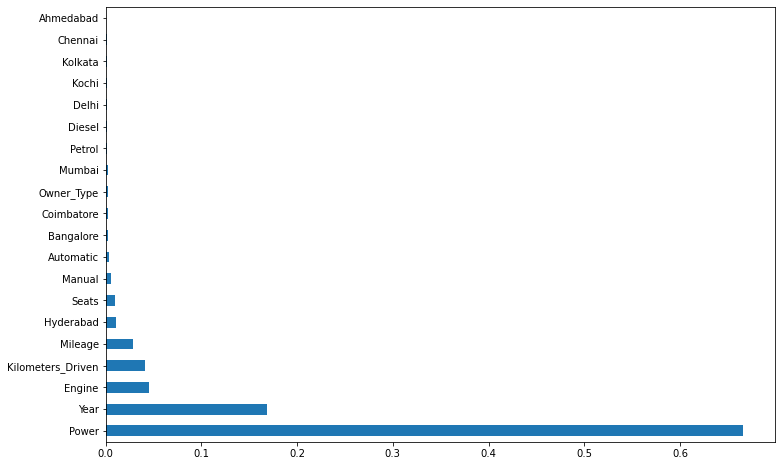

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
selection= RandomForestRegressor()
selection.fit(X,y)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7065307659161071
Accuracy on Testing set:  0.7063433833587618


In [16]:
param = {'max_features':[0.5,0.6,0.75,1], 'max_depth': [30,35,40,50]}
rf = RandomForestRegressor()
grid1 = GridSearchCV(rf,param)
grid1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30, 35, 40, 50],
                         'max_features': [0.5, 0.6, 0.75, 1]})

In [17]:
print(grid1.best_params_)
print(grid1.best_score_)

{'max_depth': 50, 'max_features': 0.5}
0.8877778576973314


In [52]:
rf = RandomForestRegressor(max_depth=50,max_features=0.5)
rf.fit(X_train,y_train)
print('train score: ', rf.score(X_train,y_train))
print('test score: ', rf.score(X_test,y_test))

train score:  0.9841663778232499
test score:  0.9118248060829923


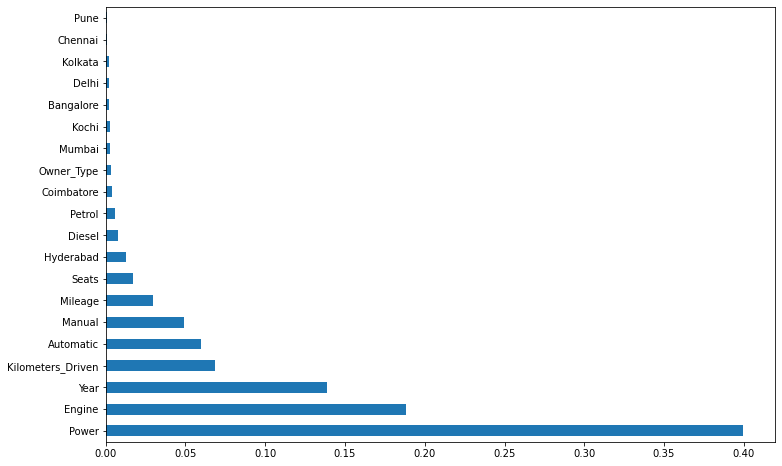

In [53]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [19]:
param = {'learning_rate':[0.3,0.5,0.7,0.9],'max_features':[0.5,0.7,0.9],'subsample':[0.3,0.6,0.9], 'max_depth':[20,30,40]}
gbr = GradientBoostingRegressor()
grid2 = GridSearchCV(gbr,param)
grid2.fit(X_train,y_train)
print(grid2.best_params_)
print(grid2.best_score_)

{'learning_rate': 0.3, 'max_depth': 20, 'max_features': 0.7, 'subsample': 0.6}
0.8769046108259939


In [54]:
gbc = GradientBoostingRegressor(learning_rate = 0.3, max_depth = 20, max_features=0.7, subsample=0.6)
gbc.fit(X_train,y_train)
print('train score: ', gbc.score(X_train,y_train))
print('test score: ', gbc.score(X_test,y_test))

train score:  0.9999954655921666
test score:  0.9081524462772648


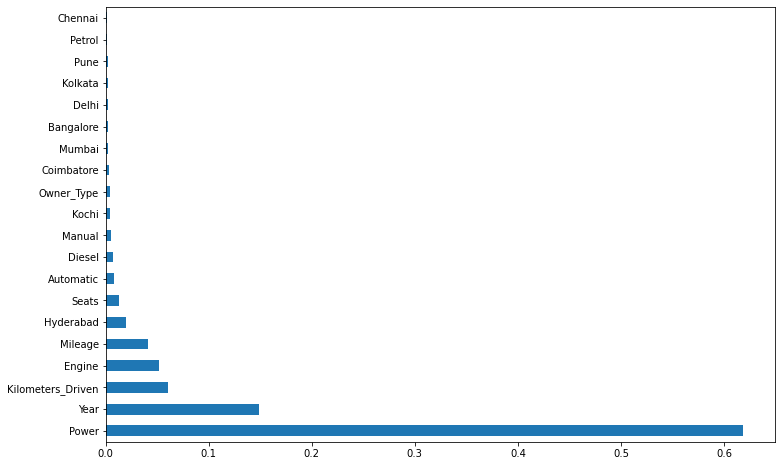

In [55]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [21]:
param = {'max_features':('sqrt', 'log2'), 'max_depth':[10,20,30]}
etr = ExtraTreesRegressor()
grid3 = GridSearchCV(etr, param)
grid3.fit(X_train,y_train)

print(grid3.best_params_)
print(grid3.best_score_)

{'max_depth': 30, 'max_features': 'log2'}
0.8653269261091765


In [56]:
etr = ExtraTreesRegressor(max_depth=30, max_features='log2')
etr.fit(X_train,y_train)
print('train score: ', etr.score(X_train,y_train))
print('test score: ', etr.score(X_test,y_test))

train score:  0.9999797323436205
test score:  0.8914446532488507


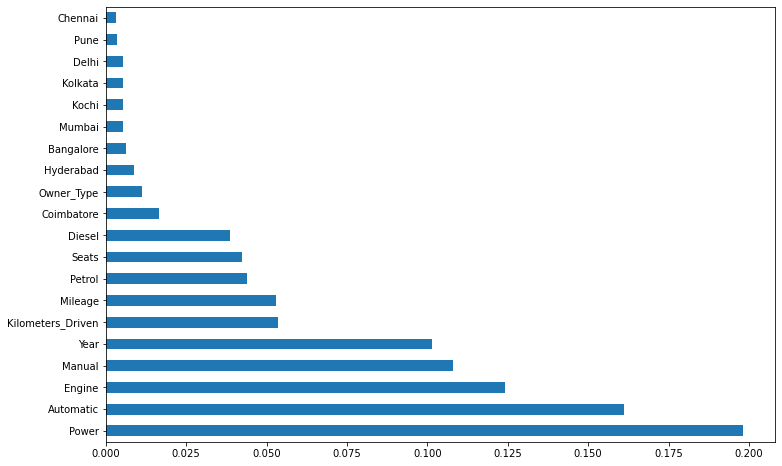

In [57]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

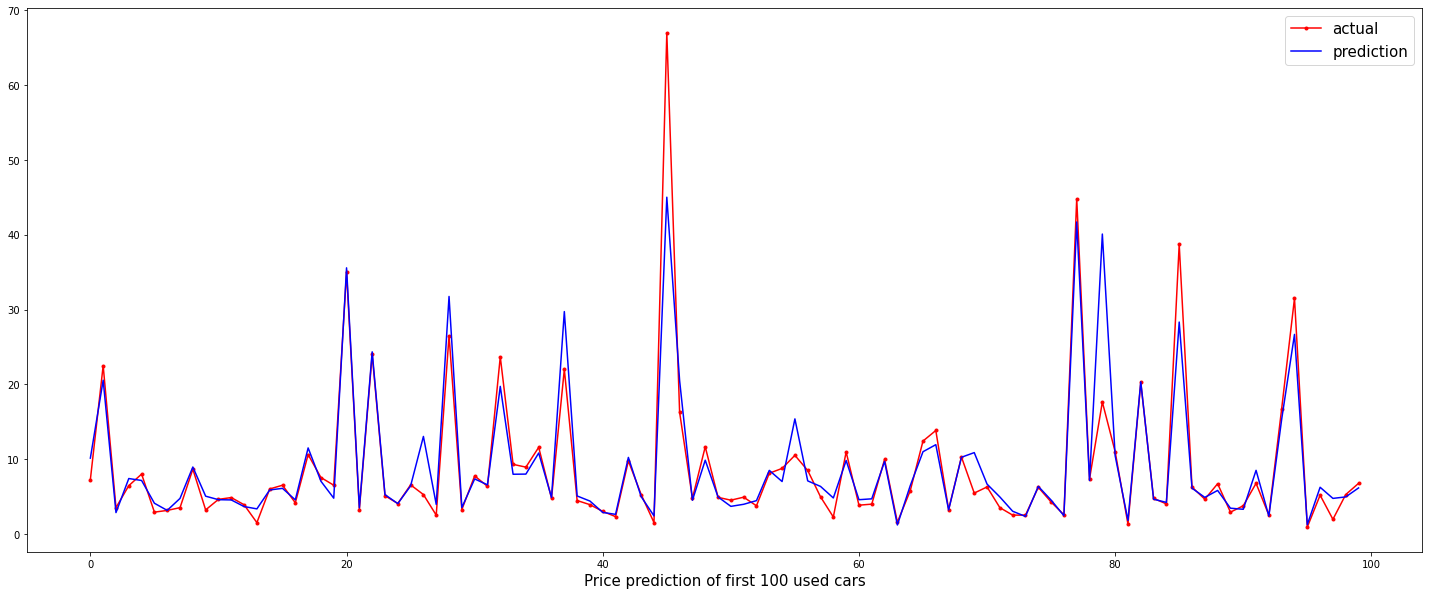

In [23]:
def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual", c='r')
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()
Graph_prediction(100, y_test, grid3.predict(X_test))

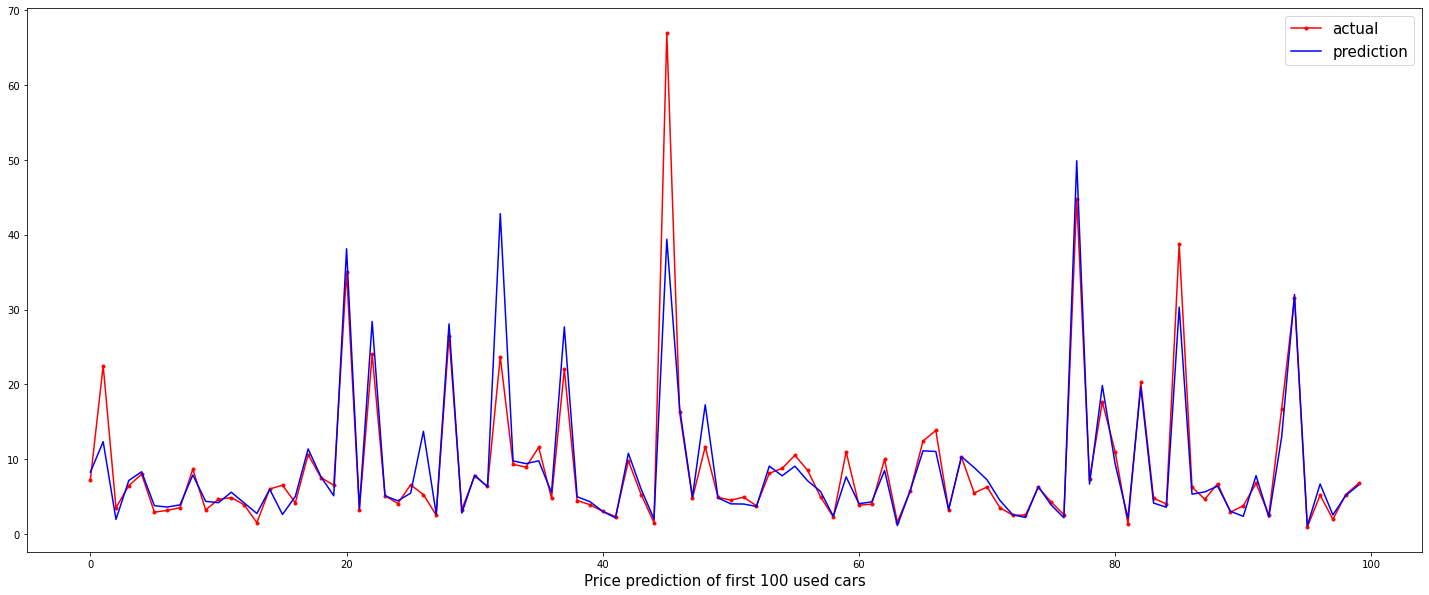

In [24]:
Graph_prediction(100, y_test, grid2.predict(X_test))

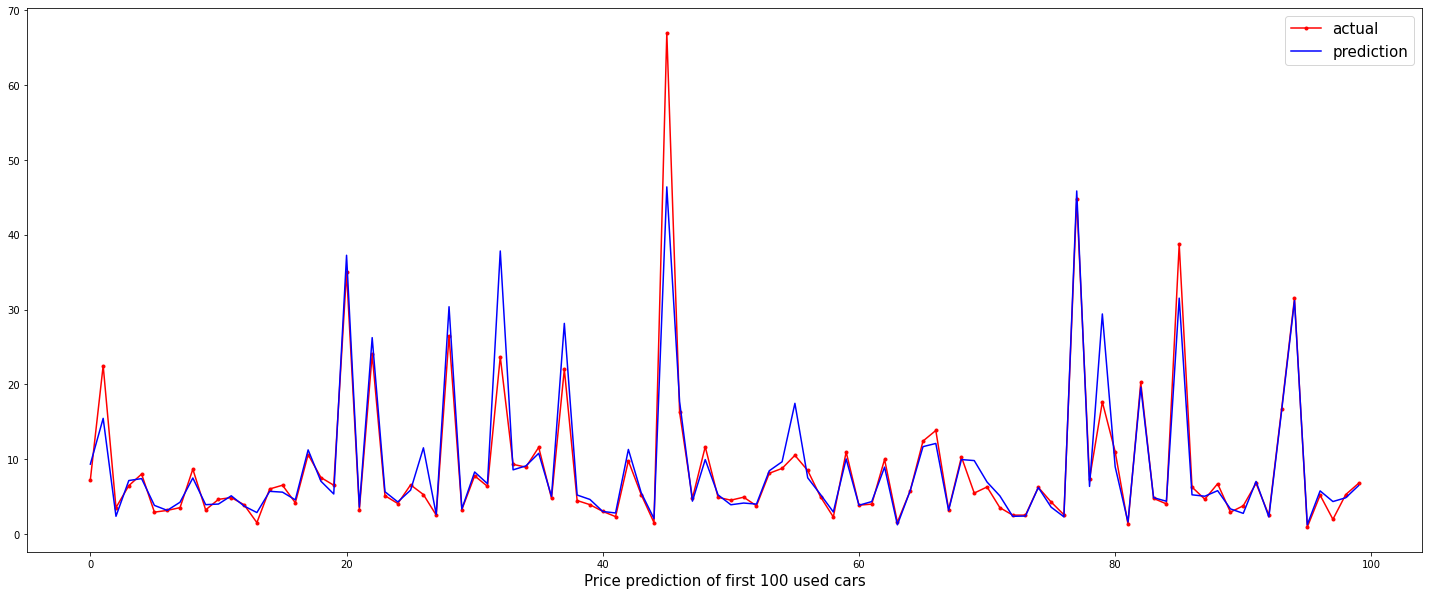

In [25]:
Graph_prediction(100, y_test, grid1.predict(X_test))

In [26]:
#Starting unsupervised learning
train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,1,28.40,1248.0,74.00,5.0,4.75
5868,Jaipur,2015,100000,Diesel,Manual,1,24.40,1120.0,71.00,5.0,4.00
5869,Jaipur,2012,55000,Diesel,Manual,2,14.00,2498.0,112.00,8.0,2.90
5870,Kolkata,2013,46000,Petrol,Manual,1,18.90,998.0,67.10,5.0,2.65


In [27]:
train.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,1.195504,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,0.445948,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,1.000000,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,1.000000,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,1.000000,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,1.000000,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [28]:
#getting rid of outlier in kilometers_driven of 6.5M Kilometers
train = train[train['Kilometers_Driven'] < 6000000]

In [29]:
X2 = train[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']]
X2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...
5867,2014,27365,28.40,1248.0,74.00,5.0,4.75
5868,2015,100000,24.40,1120.0,71.00,5.0,4.00
5869,2012,55000,14.00,2498.0,112.00,8.0,2.90
5870,2013,46000,18.90,998.0,67.10,5.0,2.65


In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X2), columns=X2.columns)
X_scale

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,-1.098873,0.391378,1.906235,-1.043460,-1.023092,-0.352475,-0.698766
1,0.481288,-0.429498,0.318807,-0.072355,0.240447,-0.352475,0.258816
2,-0.782841,-0.297099,-0.017920,-0.709227,-0.455948,-0.352475,-0.453803
3,-0.466808,0.788577,0.570780,-0.627747,-0.454834,2.131773,-0.320187
4,-0.150776,-0.438237,-0.705119,0.569505,0.511576,-0.352475,0.725581
...,...,...,...,...,...,...,...
5866,0.165256,-0.790552,2.318554,-0.627747,-0.728935,-0.352475,-0.431534
5867,0.481288,1.132815,1.402289,-0.840592,-0.784646,-0.352475,-0.498342
5868,-0.466808,-0.058780,-0.979998,1.450816,-0.023255,3.373896,-0.596327
5869,-0.150776,-0.297099,0.142426,-1.043460,-0.857071,-0.352475,-0.618596


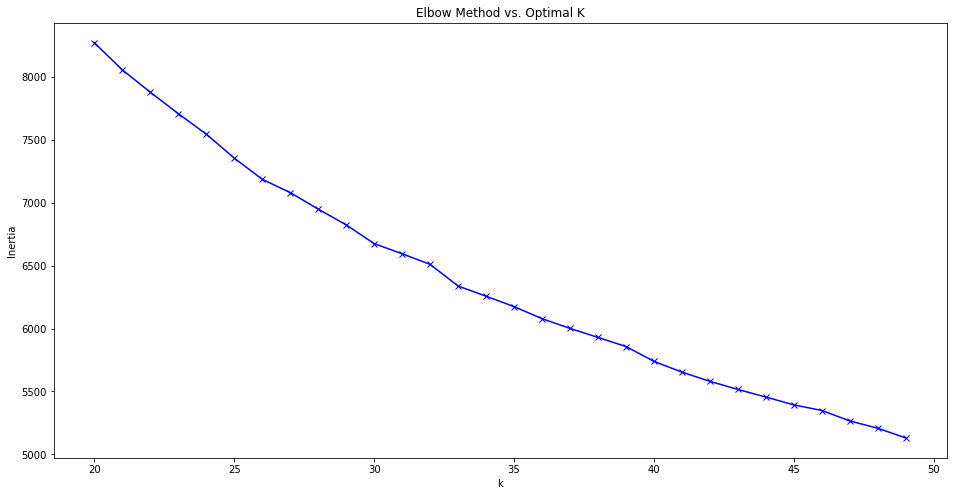

In [31]:
from sklearn.cluster import KMeans
inertia = []
K = range(20,50)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scale)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method vs. Optimal K')
plt.show()
#33 has a elbow

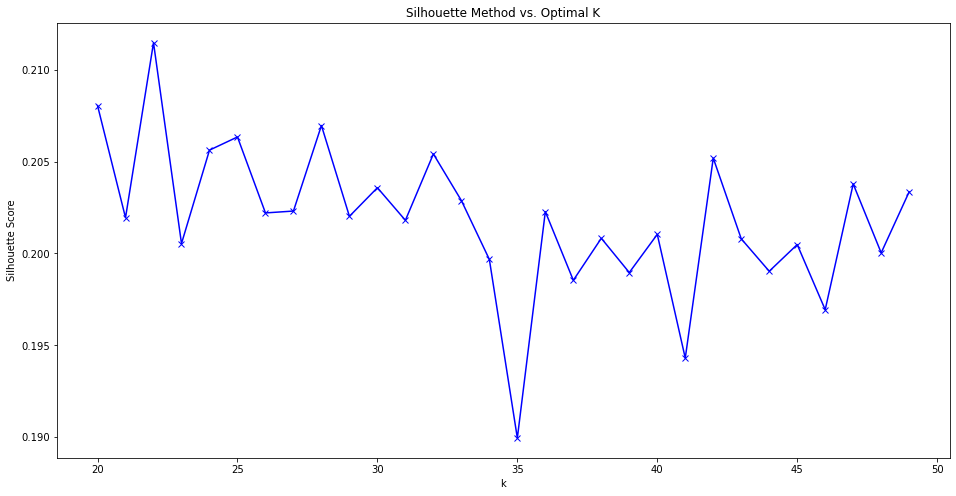

In [32]:
from sklearn.metrics import silhouette_score

sil_score = []
K = range(20,50)
for k in K:
    kmeans = KMeans(n_clusters=k)
    sil_score.append(silhouette_score(X_scale, kmeans.fit_predict(X_scale)))
plt.figure(figsize=(16,8))
plt.plot(K, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method vs. Optimal K')
plt.show()
# 32 has a local maximum, close to elbow method's 33 result, choosing 32 as number of clusters

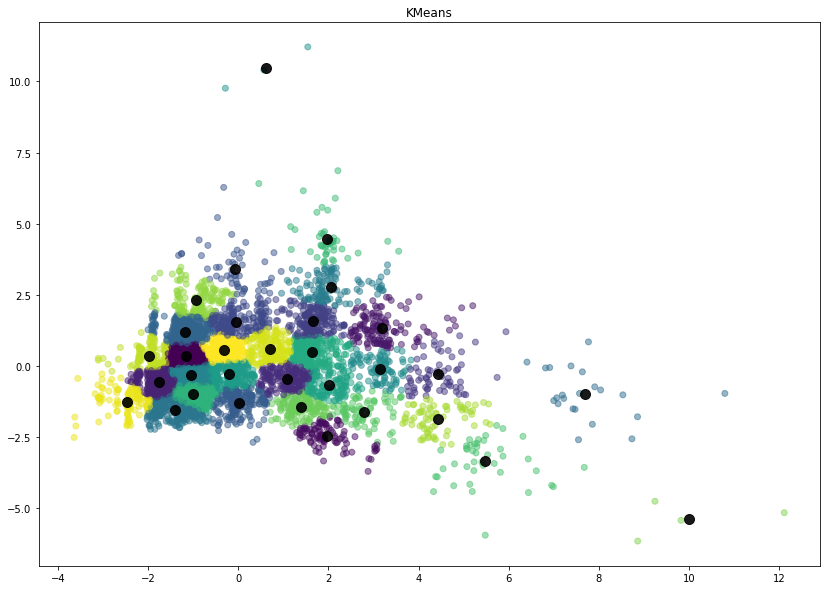

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scale)
df2 = pd.DataFrame(pc)
km=KMeans(n_clusters=32)
X_clustered=km.fit_predict(df2)
df2['cluster'] = X_clustered

center=km.cluster_centers_

plt.figure(figsize=(14,10))
plt.scatter(pc[:,0],pc[:,1],c=df2['cluster'],alpha=0.5)
plt.scatter(center[:, 0], center[:, 1], c='black', s=100, alpha=0.9)
plt.title('KMeans')
plt.show()

In [37]:
#cluster centers
km=KMeans(n_clusters=32)
X_clustered=km.fit_predict(X_scale)
centers = pd.DataFrame(km.cluster_centers_,columns=X2.columns)
center_inverse = pd.DataFrame(scale.inverse_transform(centers), columns=X2.columns)
center_inverse.style.background_gradient()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2013.586614,42507.007874,18.562205,1185.210630,78.657008,5.000000,3.928051
1,2016.638298,29067.861702,16.804734,2060.377660,180.238936,4.925532,36.149574
2,2007.540984,105281.885246,12.769508,2343.180328,108.421311,7.803279,4.445246
3,2012.742021,71538.039894,23.072394,1207.481383,72.813005,4.986702,3.692819
4,2013.025974,88015.668831,13.637662,2344.149351,114.512078,7.331169,8.200390
5,2009.786885,60150.913349,18.425808,1150.096019,71.581850,4.988290,2.429602
6,2014.927273,51319.654545,12.636909,3111.345455,252.532909,6.981818,48.292909
7,2011.081395,61514.046512,13.037558,3049.255814,258.591163,4.941860,21.238488
8,2009.550000,71825.441667,15.295250,1671.587500,116.905958,4.987500,3.609708
9,2015.789474,49777.636842,26.135632,1303.815789,83.574211,4.994737,6.204789


In [38]:
df1 = train
df1['KMCluster'] = X_clustered


<ipython-input-38-da7a22fbc78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['KMCluster'] = X_clustered


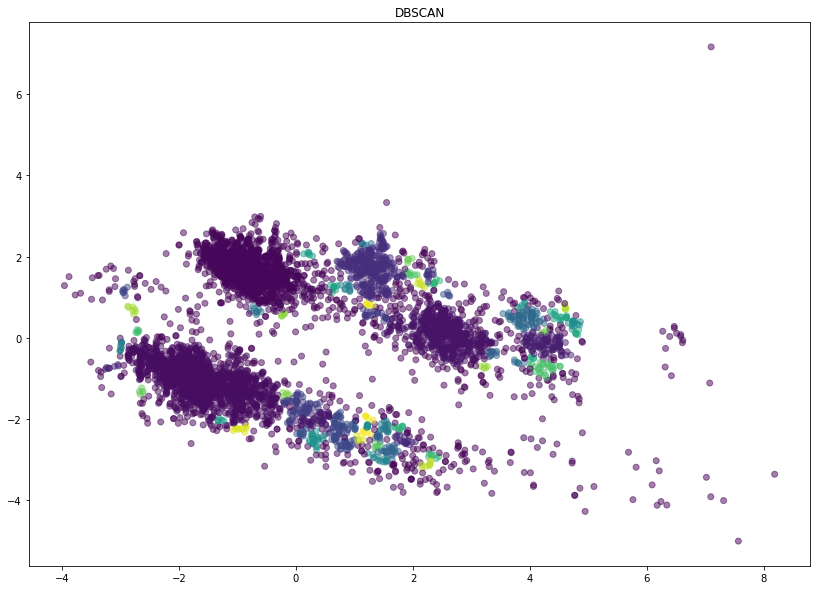

In [39]:
from sklearn.cluster import DBSCAN

scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X), columns=X.columns)


pca = PCA(n_components=2).fit_transform(X_scale)
df3 = pd.DataFrame(pca)
dbscan = DBSCAN(eps=0.1, min_samples=5)
X_clusters = dbscan.fit_predict(df3)
df3['cluster'] = X_clusters

plt.figure(figsize=(14,10))
plt.scatter(df3[0],df3[1],c=df3['cluster'],alpha=0.5)
plt.title('DBSCAN')
plt.show()

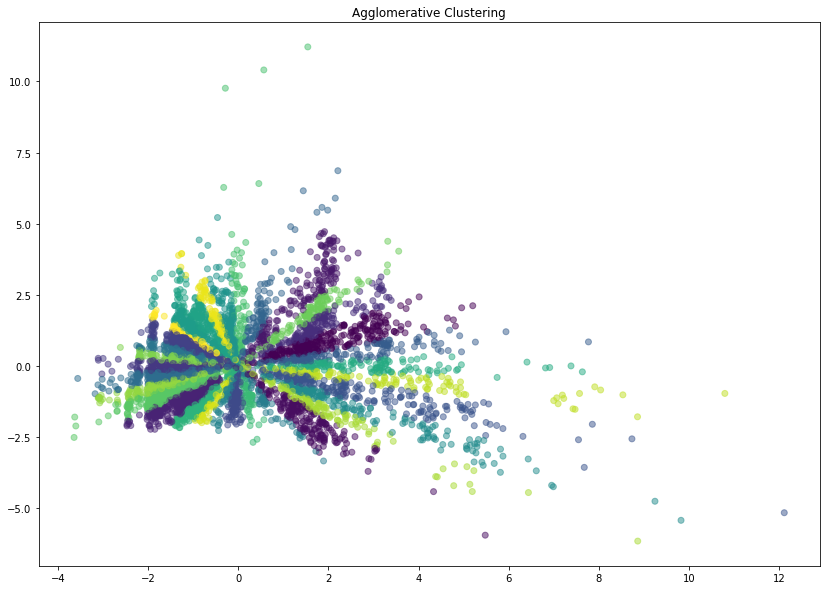

In [40]:
from sklearn.cluster import AgglomerativeClustering

scale = StandardScaler()
X_scale3 = pd.DataFrame(scale.fit_transform(X2), columns=X2.columns)


pca = PCA(n_components=2).fit_transform(X_scale3)
df4 = pd.DataFrame(pca)
agg = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=32)
AC_clusters = agg.fit_predict(df4)

plt.figure(figsize=(14,10))
plt.scatter(pc[:,0],pc[:,1],c=AC_clusters,alpha=0.5)
plt.title('Agglomerative Clustering')
plt.show()

In [41]:
X_scale3['cluster'] = AC_clusters
pd.DataFrame(scale.inverse_transform(X_scale3.groupby('cluster').mean()),columns=X2.columns).style.background_gradient()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2011.962687,72148.958955,13.382127,2422.250000,166.905970,6.078358,11.359254
1,2016.405128,27565.810256,17.849077,2008.507692,168.448718,4.969231,27.924923
2,2009.238710,117971.922581,13.634194,2226.109677,125.608903,6.464516,5.439677
3,2016.563025,27702.983193,21.337332,1252.331933,85.487090,5.031513,6.488508
4,2011.777108,87669.554217,13.246928,2333.078313,142.870482,6.343373,8.950542
5,2013.434028,58221.413194,21.494063,1234.152778,78.862604,5.017361,4.184410
6,2011.242958,68654.292254,19.655669,1227.088028,77.662430,5.091549,3.250106
7,2016.594828,31160.293103,17.916638,1559.525862,118.434310,5.008621,11.014224
8,2014.773585,45291.646226,14.398821,2423.273585,199.710472,5.481132,28.130755
9,2012.810127,67377.493671,13.456709,2457.873418,180.436329,5.854430,15.395380


In [42]:
df1['ACCluster'] = AC_clusters

<ipython-input-42-c0f6d6eb07e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ACCluster'] = AC_clusters


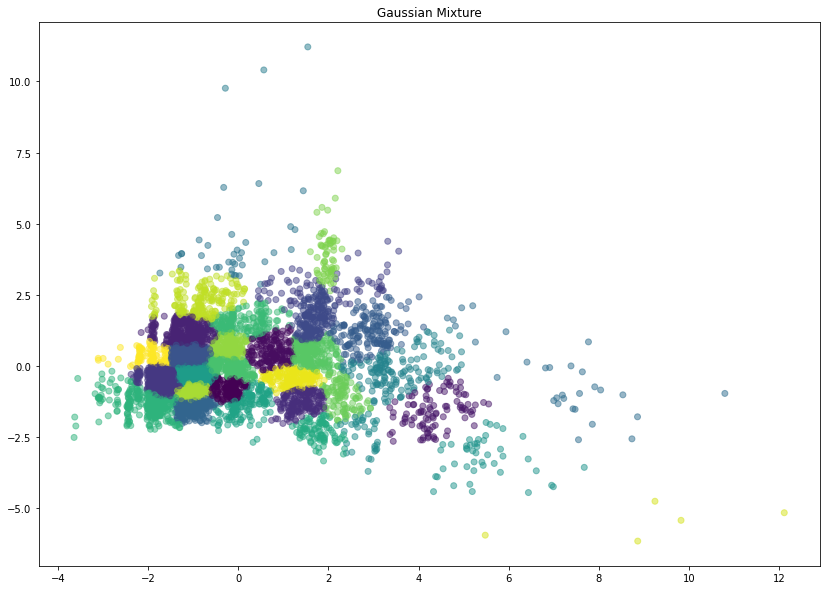

In [43]:
from sklearn.mixture import GaussianMixture

scale = StandardScaler()
X_scale4 = pd.DataFrame(scale.fit_transform(X2), columns=X2.columns)


pca = PCA(n_components=2).fit_transform(X_scale4)
df5 = pd.DataFrame(pca)
gmm = GaussianMixture(n_components=32, random_state=123)
gmm_clusters = gmm.fit_predict(df5)


plt.figure(figsize=(14,10))
plt.scatter(pc[:,0],pc[:,1],c=gmm_clusters,alpha=0.5)
plt.title('Gaussian Mixture')
plt.show()

In [44]:
X_scale4['cluster'] = gmm_clusters
pd.DataFrame(scale.inverse_transform(X_scale4.groupby('cluster').mean()),columns=X2.columns).style.background_gradient()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2015.750000,37798.517442,18.308895,1519.819767,114.625291,5.104651,8.760872
1,2011.772727,65877.681818,16.077955,1926.426136,146.305568,5.153409,8.397216
2,2015.561224,38068.642857,12.431531,2924.102041,240.073265,5.653061,43.075306
3,2010.096859,78294.094241,19.193010,1189.219895,72.112644,5.013089,2.600209
4,2015.551724,35943.137931,17.211552,2022.775862,167.672241,5.097701,22.695057
5,2014.797900,48821.026247,23.518871,1111.104987,69.047060,5.010499,4.183622
6,2008.478261,130526.536232,12.368116,2418.115942,145.167101,6.246377,6.874348
7,2011.475248,87705.683168,13.037178,2305.262376,131.866287,6.727723,7.309554
8,2012.423006,61880.111317,20.001373,1258.923933,78.136902,5.037106,3.694230
9,2011.814371,84955.119760,11.773054,2778.760479,184.587904,6.353293,14.168084


In [45]:
df1['GMCluster'] = gmm_clusters


<ipython-input-45-c50f0378bd24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GMCluster'] = gmm_clusters


In [46]:
print(df1['KMCluster'].value_counts())
print(df1['ACCluster'].value_counts())
print(df1['GMCluster'].value_counts())

16    539
0     509
5     429
28    391
9     380
3     374
11    304
25    276
29    266
14    255
31    244
8     240
1     188
12    158
4     154
21    125
22    123
20    113
26    102
23     94
27     89
7      86
19     80
17     69
18     66
2      61
6      55
15     45
13     20
30     18
24     12
10      6
Name: KMCluster, dtype: int64
3     476
23    419
11    389
26    290
5     288
6     284
0     268
12    240
25    237
8     212
1     195
17    179
20    178
18    168
16    168
4     166
15    164
9     158
2     155
19    134
28    132
27    123
24    117
7     116
30    109
31    105
10     96
22     71
14     64
29     61
13     59
21     50
Name: ACCluster, dtype: int64
8     539
17    517
3     382
5     381
27    346
20    310
10    269
22    261
26    234
23    213
7     202
28    193
1     176
21    175
4     174
30    172
0     172
9     167
18    150
14    149
24    107
31    103
2      98
19     93
6      69
25     65
16     45
12     36
15     35
11     30


In [ ]:
#choosing Agglomerative Clustering as final model. End of main content.





#Below are some other visualizations

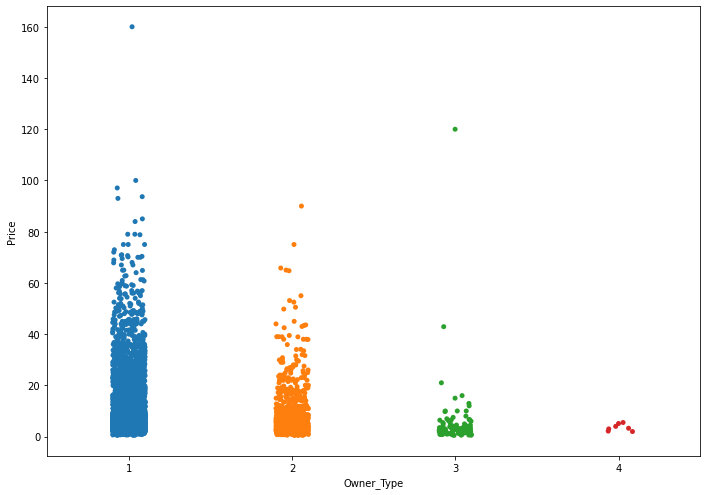

In [48]:
import seaborn as sns
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train) 

In [50]:
import plotly.express as px

ep = train['Owner_Type'].value_counts().reset_index()
ep.columns = [
    'Owner_Type', 
    'percent'
]
ep['percent'] /= len(train)

fig = px.pie(
    ep, 
    names=['1st','2nd','3rd','4th & Above'], 
    values='percent', 
    title='Countplot of Owner_Type', 
    width=800,
    height=500 
)

fig.show()